In [151]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split, KFold, cross_val_score, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
%matplotlib inline

In [85]:
titanic_df = pd.read_csv("./titanic_train.csv")
titanic_df.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [86]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [87]:
titanic_df_drop = titanic_df.drop(['PassengerId','Name','Ticket'], axis=1)
titanic_df_drop.head(3)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,male,22.0,1,0,7.2500,NaN,S
1,1,1,female,38.0,1,0,71.2833,C85,C
2,1,3,female,26.0,0,0,7.9250,NaN,S


In [88]:
titanic_df_drop.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [89]:
titanic_df_drop.isna().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [90]:
titanic_df_drop['Age'] = titanic_df_drop['Age'].fillna(titanic_df_drop['Age'].mean())
titanic_df_drop['Cabin'] = titanic_df_drop['Cabin'].fillna('N')
titanic_df_drop['Embarked'] = titanic_df_drop['Embarked'].fillna('N')
print('데이터 세트 Null 값 개수 ', titanic_df_drop.isnull().sum().sum())

데이터 세트 Null 값 개수  0


In [91]:
print('Sex 값 분포 :\n', titanic_df_drop['Sex'].value_counts())
print('\nCabin 값 분포 :\n', titanic_df_drop['Cabin'].value_counts())
print('\nEmbarked 값 분포 :\n', titanic_df_drop['Embarked'].value_counts())

Sex 값 분포 :
 male      577
female    314
Name: Sex, dtype: int64

Cabin 값 분포 :
 N              687
B96 B98          4
G6               4
C23 C25 C27      4
F2               3
              ... 
C111             1
A7               1
C82              1
B19              1
B39              1
Name: Cabin, Length: 148, dtype: int64

Embarked 값 분포 :
 S    644
C    168
Q     77
N      2
Name: Embarked, dtype: int64


In [92]:
titanic_df_drop['Cabin']=titanic_df_drop['Cabin'].str[:1]
print(titanic_df_drop['Cabin'].head(3))

0    N
1    C
2    N
Name: Cabin, dtype: object


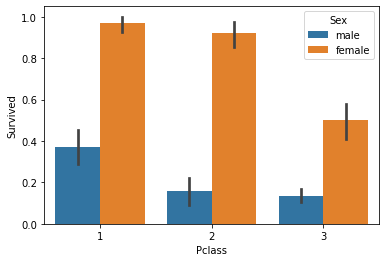

In [79]:
sns.barplot(x='Pclass', y='Survived',hue='Sex', data=titanic_df_drop)

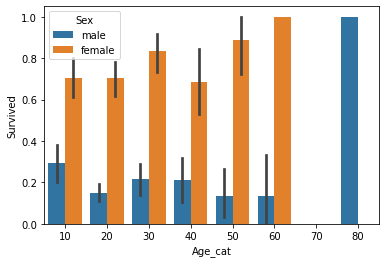

In [93]:
def get_category(age):
    cat = ''
    if age < 20: cat = '10'
    elif age < 30: cat = '20'
    elif age < 40: cat = '30'
    elif age < 50: cat = '40'
    elif age < 60: cat = '50'
    elif age < 70: cat = '60'
    elif age < 80: cat = '70'
    else : cat = '80'
    
    return cat

titanic_df_drop['Age_cat'] = titanic_df_drop['Age'].apply(lambda x : get_category(x))
sns.barplot(x='Age_cat', y='Survived', hue='Sex', data=titanic_df_drop)
titanic_df_drop = titanic_df_drop.drop('Age_cat', axis=1)

In [94]:
titanic_df_drop = pd.get_dummies(titanic_df_drop)
titanic_df_drop.head(3)

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Cabin_A,Cabin_B,...,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_N,Cabin_T,Embarked_C,Embarked_N,Embarked_Q,Embarked_S
0,0,3,22.0,1,0,7.2500,0,1,0,0,...,0,0,0,0,1,0,0,0,0,1
1,1,1,38.0,1,0,71.2833,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,1,3,26.0,0,0,7.9250,1,0,0,0,...,0,0,0,0,1,0,0,0,0,1


In [104]:
scaler = MinMaxScaler()
scaled_titanic = scaler.fit_transform(titanic_df_drop)
scaled_titanic_df = pd.DataFrame(data = scaled_titanic, columns = titanic_df_drop.columns)
scaled_titanic_df

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Cabin_A,Cabin_B,...,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_N,Cabin_T,Embarked_C,Embarked_N,Embarked_Q,Embarked_S
0,0.0,1.0,0.271174,0.125,0.000000,0.014151,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
1,1.0,0.0,0.472229,0.125,0.000000,0.139136,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,1.0,1.0,0.321438,0.000,0.000000,0.015469,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
3,1.0,0.0,0.434531,0.125,0.000000,0.103644,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.0,1.0,0.434531,0.000,0.000000,0.015713,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0.0,0.5,0.334004,0.000,0.000000,0.025374,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
887,1.0,0.0,0.233476,0.000,0.000000,0.058556,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
888,0.0,1.0,0.367921,0.125,0.333333,0.045771,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
889,1.0,0.0,0.321438,0.000,0.000000,0.058556,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [106]:
y_titanic_df = scaled_titanic_df['Survived']
x_titanic_df = scaled_titanic_df.drop('Survived', axis=1)

x_train, x_test, y_train, y_test = train_test_split(x_titanic_df, y_titanic_df, test_size=0.2, random_state=11)

In [117]:
#Decision Tree 클래스 생성 및 학습 예측 평가
dcs_tree = DecisionTreeClassifier(random_state=11)
dcs_tree.fit(x_train, y_train)
dcs_predicted = dcs_tree.predict(x_test)
print('Decision Tree Accuracy Score :{0:.4f}'.format(accuracy_score(y_test, dcs_predicted)))

Decision Tree: score :0.8380


In [118]:
#Random Forest 클래스 생성 및 학습 예측 평가
rf = RandomForestClassifier(random_state=11)
rf.fit(x_train, y_train)
rf_predicted = rf.predict(x_test)
print('Random Forest Accuracy Score :{0:.4f}'.format(accuracy_score(y_test, rf_predicted)))

Random Forest Accuracy Score :0.8436


In [120]:
#Logistic Regression 클래스 생성 및 학습 예측 평가
lr = LogisticRegression()
lr.fit(x_train, y_train)
lr_predicted = lr.predict(x_test)
print('Logistic Regression Accuracy Score :{0:.4f}'.format(accuracy_score(y_test, lr_predicted)))

Logistic Regression Accuracy Score :0.8380


In [124]:
#Cat Boost 클래스 생성 및 학습 예측 평가
cb = CatBoostClassifier(random_state=11)
cb.fit(x_train, y_train)
cb_predicted = cb.predict(x_test)
print('Categorical Boosting Accuracy Score :{0:.4f}'.format(accuracy_score(y_test, cb_predicted)))

Learning rate set to 0.008911
0:	learn: 0.6874194	total: 2.05ms	remaining: 2.05s
1:	learn: 0.6825476	total: 3.33ms	remaining: 1.66s
2:	learn: 0.6786588	total: 4.09ms	remaining: 1.36s
3:	learn: 0.6745946	total: 4.86ms	remaining: 1.21s
4:	learn: 0.6697974	total: 6.06ms	remaining: 1.21s
5:	learn: 0.6647331	total: 7.23ms	remaining: 1.2s
6:	learn: 0.6594033	total: 8.11ms	remaining: 1.15s
7:	learn: 0.6562776	total: 9ms	remaining: 1.11s
8:	learn: 0.6517756	total: 10.2ms	remaining: 1.13s
9:	learn: 0.6468021	total: 11.5ms	remaining: 1.13s
10:	learn: 0.6422749	total: 12.7ms	remaining: 1.14s
11:	learn: 0.6377447	total: 13.8ms	remaining: 1.14s
12:	learn: 0.6353972	total: 14.4ms	remaining: 1.09s
13:	learn: 0.6307742	total: 15.8ms	remaining: 1.11s
14:	learn: 0.6281212	total: 16.4ms	remaining: 1.08s
15:	learn: 0.6240062	total: 17.5ms	remaining: 1.08s
16:	learn: 0.6210739	total: 18.2ms	remaining: 1.05s
17:	learn: 0.6176160	total: 19.4ms	remaining: 1.06s
18:	learn: 0.6133191	total: 20.6ms	remaining: 1.

281:	learn: 0.3803499	total: 320ms	remaining: 816ms
282:	learn: 0.3800907	total: 322ms	remaining: 815ms
283:	learn: 0.3799191	total: 323ms	remaining: 815ms
284:	learn: 0.3797899	total: 324ms	remaining: 814ms
285:	learn: 0.3795214	total: 326ms	remaining: 813ms
286:	learn: 0.3793926	total: 327ms	remaining: 812ms
287:	learn: 0.3791421	total: 328ms	remaining: 811ms
288:	learn: 0.3789950	total: 329ms	remaining: 810ms
289:	learn: 0.3787503	total: 331ms	remaining: 809ms
290:	learn: 0.3785663	total: 332ms	remaining: 808ms
291:	learn: 0.3783880	total: 333ms	remaining: 807ms
292:	learn: 0.3782027	total: 334ms	remaining: 806ms
293:	learn: 0.3779187	total: 335ms	remaining: 805ms
294:	learn: 0.3776514	total: 337ms	remaining: 805ms
295:	learn: 0.3774267	total: 338ms	remaining: 804ms
296:	learn: 0.3772259	total: 339ms	remaining: 803ms
297:	learn: 0.3770220	total: 341ms	remaining: 802ms
298:	learn: 0.3768642	total: 342ms	remaining: 801ms
299:	learn: 0.3767243	total: 343ms	remaining: 800ms
300:	learn: 

564:	learn: 0.3381894	total: 652ms	remaining: 502ms
565:	learn: 0.3381125	total: 653ms	remaining: 501ms
566:	learn: 0.3380465	total: 654ms	remaining: 500ms
567:	learn: 0.3378847	total: 655ms	remaining: 498ms
568:	learn: 0.3377863	total: 656ms	remaining: 497ms
569:	learn: 0.3376925	total: 658ms	remaining: 496ms
570:	learn: 0.3375286	total: 659ms	remaining: 495ms
571:	learn: 0.3375106	total: 660ms	remaining: 494ms
572:	learn: 0.3373548	total: 662ms	remaining: 493ms
573:	learn: 0.3372288	total: 663ms	remaining: 492ms
574:	learn: 0.3370808	total: 665ms	remaining: 491ms
575:	learn: 0.3370278	total: 666ms	remaining: 490ms
576:	learn: 0.3368401	total: 667ms	remaining: 489ms
577:	learn: 0.3366826	total: 668ms	remaining: 488ms
578:	learn: 0.3365603	total: 670ms	remaining: 487ms
579:	learn: 0.3365352	total: 671ms	remaining: 486ms
580:	learn: 0.3364512	total: 672ms	remaining: 485ms
581:	learn: 0.3363966	total: 674ms	remaining: 484ms
582:	learn: 0.3363772	total: 675ms	remaining: 483ms
583:	learn: 

814:	learn: 0.3114545	total: 978ms	remaining: 222ms
815:	learn: 0.3114099	total: 980ms	remaining: 221ms
816:	learn: 0.3113093	total: 981ms	remaining: 220ms
817:	learn: 0.3112382	total: 982ms	remaining: 219ms
818:	learn: 0.3111923	total: 983ms	remaining: 217ms
819:	learn: 0.3110410	total: 985ms	remaining: 216ms
820:	learn: 0.3108938	total: 986ms	remaining: 215ms
821:	learn: 0.3108874	total: 987ms	remaining: 214ms
822:	learn: 0.3107982	total: 988ms	remaining: 212ms
823:	learn: 0.3106127	total: 989ms	remaining: 211ms
824:	learn: 0.3105925	total: 990ms	remaining: 210ms
825:	learn: 0.3104182	total: 991ms	remaining: 209ms
826:	learn: 0.3102982	total: 993ms	remaining: 208ms
827:	learn: 0.3102049	total: 994ms	remaining: 206ms
828:	learn: 0.3100728	total: 995ms	remaining: 205ms
829:	learn: 0.3098944	total: 996ms	remaining: 204ms
830:	learn: 0.3097993	total: 997ms	remaining: 203ms
831:	learn: 0.3096887	total: 998ms	remaining: 202ms
832:	learn: 0.3096333	total: 1000ms	remaining: 200ms
833:	learn:

In [129]:
#Gradient Boost 클래스 생성 및 학습 예측 평가
gb = GradientBoostingClassifier(random_state=11)
gb.fit(x_train, y_train)
gb_predicted = gb.predict(x_test)
print('Gradient Boosting Accuracy Score :{0:.4f}'.format(accuracy_score(y_test, gb_predicted)))

Gradient Boosting Accuracy Score :0.8827


In [130]:
#Extreme Gradient Boost 클래스 생성 및 학습 예측 평가
xgb = XGBClassifier(random_state=11)
xgb.fit(x_train, y_train)
xgb_predicted = xgb.predict(x_test)
print('XGBoosting Accuracy Score :{0:.4f}'.format(accuracy_score(y_test, xgb_predicted)))

XGBoosting Accuracy Score :0.8492


In [133]:
#Voting 클래스 생성 및 학습 예측 평가
mlp =  MLPClassifier(solver='adam', alpha=0.001, hidden_layer_sizes=(8,8), learning_rate='adaptive', max_iter = 1000, random_state=11)
mlp.fit(x_train, y_train)

voting_model = VotingClassifier(estimators=[('MLPClassifier', mlp), ('XGBClassifier', xgb), ('GradientBoostingClassifier', gb), ('CatBoostClassifier',cb), ('RandomForestClassifier', rf)], voting='hard')
voting_model.fit(x_train, y_train)
print('Voting: score is %s'%(voting_model.score(x_test, y_test)))

Learning rate set to 0.008911
0:	learn: 0.6874194	total: 1.75ms	remaining: 1.75s
1:	learn: 0.6825476	total: 3.09ms	remaining: 1.54s
2:	learn: 0.6786588	total: 3.95ms	remaining: 1.31s
3:	learn: 0.6745946	total: 4.75ms	remaining: 1.18s
4:	learn: 0.6697974	total: 6.03ms	remaining: 1.2s
5:	learn: 0.6647331	total: 7.4ms	remaining: 1.23s
6:	learn: 0.6594033	total: 8.45ms	remaining: 1.2s
7:	learn: 0.6562776	total: 9.38ms	remaining: 1.16s
8:	learn: 0.6517756	total: 10.6ms	remaining: 1.17s
9:	learn: 0.6468021	total: 12.1ms	remaining: 1.2s
10:	learn: 0.6422749	total: 13.4ms	remaining: 1.21s
11:	learn: 0.6377447	total: 14.7ms	remaining: 1.21s
12:	learn: 0.6353972	total: 15.3ms	remaining: 1.16s
13:	learn: 0.6307742	total: 16.5ms	remaining: 1.16s
14:	learn: 0.6281212	total: 17.2ms	remaining: 1.13s
15:	learn: 0.6240062	total: 18.4ms	remaining: 1.13s
16:	learn: 0.6210739	total: 19.2ms	remaining: 1.11s
17:	learn: 0.6176160	total: 20.4ms	remaining: 1.11s
18:	learn: 0.6133191	total: 21.6ms	remaining: 1.

273:	learn: 0.3817834	total: 316ms	remaining: 837ms
274:	learn: 0.3817391	total: 317ms	remaining: 836ms
275:	learn: 0.3814326	total: 318ms	remaining: 835ms
276:	learn: 0.3811552	total: 320ms	remaining: 835ms
277:	learn: 0.3810525	total: 321ms	remaining: 834ms
278:	learn: 0.3808406	total: 323ms	remaining: 834ms
279:	learn: 0.3806042	total: 324ms	remaining: 833ms
280:	learn: 0.3804535	total: 325ms	remaining: 832ms
281:	learn: 0.3803499	total: 326ms	remaining: 831ms
282:	learn: 0.3800907	total: 328ms	remaining: 830ms
283:	learn: 0.3799191	total: 329ms	remaining: 829ms
284:	learn: 0.3797899	total: 330ms	remaining: 828ms
285:	learn: 0.3795214	total: 331ms	remaining: 827ms
286:	learn: 0.3793926	total: 332ms	remaining: 826ms
287:	learn: 0.3791421	total: 334ms	remaining: 825ms
288:	learn: 0.3789950	total: 335ms	remaining: 824ms
289:	learn: 0.3787503	total: 336ms	remaining: 823ms
290:	learn: 0.3785663	total: 337ms	remaining: 822ms
291:	learn: 0.3783880	total: 339ms	remaining: 821ms
292:	learn: 

552:	learn: 0.3398301	total: 646ms	remaining: 522ms
553:	learn: 0.3397186	total: 647ms	remaining: 521ms
554:	learn: 0.3397057	total: 648ms	remaining: 519ms
555:	learn: 0.3395226	total: 649ms	remaining: 518ms
556:	learn: 0.3394270	total: 650ms	remaining: 517ms
557:	learn: 0.3393073	total: 651ms	remaining: 516ms
558:	learn: 0.3391131	total: 652ms	remaining: 515ms
559:	learn: 0.3390095	total: 654ms	remaining: 514ms
560:	learn: 0.3389211	total: 655ms	remaining: 512ms
561:	learn: 0.3387067	total: 656ms	remaining: 511ms
562:	learn: 0.3386233	total: 657ms	remaining: 510ms
563:	learn: 0.3384977	total: 658ms	remaining: 509ms
564:	learn: 0.3381894	total: 660ms	remaining: 508ms
565:	learn: 0.3381125	total: 661ms	remaining: 507ms
566:	learn: 0.3380465	total: 662ms	remaining: 506ms
567:	learn: 0.3378847	total: 663ms	remaining: 505ms
568:	learn: 0.3377863	total: 665ms	remaining: 503ms
569:	learn: 0.3376925	total: 666ms	remaining: 502ms
570:	learn: 0.3375286	total: 667ms	remaining: 501ms
571:	learn: 

824:	learn: 0.3105925	total: 974ms	remaining: 207ms
825:	learn: 0.3104182	total: 976ms	remaining: 206ms
826:	learn: 0.3102982	total: 977ms	remaining: 204ms
827:	learn: 0.3102049	total: 979ms	remaining: 203ms
828:	learn: 0.3100728	total: 981ms	remaining: 202ms
829:	learn: 0.3098944	total: 982ms	remaining: 201ms
830:	learn: 0.3097993	total: 983ms	remaining: 200ms
831:	learn: 0.3096887	total: 985ms	remaining: 199ms
832:	learn: 0.3096333	total: 986ms	remaining: 198ms
833:	learn: 0.3096148	total: 988ms	remaining: 197ms
834:	learn: 0.3095198	total: 989ms	remaining: 195ms
835:	learn: 0.3094197	total: 991ms	remaining: 194ms
836:	learn: 0.3093829	total: 992ms	remaining: 193ms
837:	learn: 0.3093010	total: 994ms	remaining: 192ms
838:	learn: 0.3092452	total: 995ms	remaining: 191ms
839:	learn: 0.3091317	total: 996ms	remaining: 190ms
840:	learn: 0.3091068	total: 997ms	remaining: 189ms
841:	learn: 0.3090316	total: 999ms	remaining: 187ms
842:	learn: 0.3089687	total: 1s	remaining: 186ms
843:	learn: 0.3

Voting: score is 0.8770949720670391


In [164]:
#KFOLD validation
def exec_kfold(clf, folds=5):
    kfold = KFold(n_splits=folds)
    scores = []
    
    for iter_count, (train_index, test_index) in enumerate(kfold.split(x_titanic_df)):
        x_train, x_test = x_titanic_df.values[train_index], x_titanic_df.values[test_index]
        y_train, y_test = y_titanic_df.values[train_index], y_titanic_df.values[test_index]
        clf.fit(x_train, y_train)
        predictions = clf.predict(x_test)
        accuracy = accuracy_score(y_test, predictions)
        scores.append(accuracy)
        print("KFold {0} Accuracy : {1:.4f}".format(iter_count, accuracy))
        
    mean_score = np.mean(scores)
    print("Average Accuracy : {0:.4f}".format(mean_score))
    
exec_kfold(cb, folds=5)

Learning rate set to 0.008911
0:	learn: 0.6867365	total: 1.41ms	remaining: 1.41s
1:	learn: 0.6811094	total: 2.58ms	remaining: 1.29s
2:	learn: 0.6768925	total: 3.32ms	remaining: 1.1s
3:	learn: 0.6714200	total: 4.44ms	remaining: 1.11s
4:	learn: 0.6663322	total: 5.56ms	remaining: 1.11s
5:	learn: 0.6619723	total: 6.21ms	remaining: 1.03s
6:	learn: 0.6559700	total: 7.33ms	remaining: 1.04s
7:	learn: 0.6517516	total: 8.48ms	remaining: 1.05s
8:	learn: 0.6469275	total: 9.6ms	remaining: 1.06s
9:	learn: 0.6410543	total: 10.7ms	remaining: 1.06s
10:	learn: 0.6363134	total: 11.6ms	remaining: 1.04s
11:	learn: 0.6313484	total: 12.7ms	remaining: 1.05s
12:	learn: 0.6289623	total: 13.2ms	remaining: 1s
13:	learn: 0.6246986	total: 14.3ms	remaining: 1.01s
14:	learn: 0.6207522	total: 15.4ms	remaining: 1.01s
15:	learn: 0.6166757	total: 16.6ms	remaining: 1.02s
16:	learn: 0.6125945	total: 17.6ms	remaining: 1.02s
17:	learn: 0.6085721	total: 18.7ms	remaining: 1.02s
18:	learn: 0.6039577	total: 19.9ms	remaining: 1.0

285:	learn: 0.3553446	total: 315ms	remaining: 785ms
286:	learn: 0.3552163	total: 316ms	remaining: 785ms
287:	learn: 0.3550177	total: 317ms	remaining: 784ms
288:	learn: 0.3548643	total: 319ms	remaining: 784ms
289:	learn: 0.3546323	total: 320ms	remaining: 783ms
290:	learn: 0.3544073	total: 321ms	remaining: 782ms
291:	learn: 0.3540457	total: 322ms	remaining: 781ms
292:	learn: 0.3539866	total: 323ms	remaining: 780ms
293:	learn: 0.3538882	total: 324ms	remaining: 779ms
294:	learn: 0.3538074	total: 326ms	remaining: 778ms
295:	learn: 0.3536502	total: 327ms	remaining: 778ms
296:	learn: 0.3533826	total: 328ms	remaining: 777ms
297:	learn: 0.3530387	total: 329ms	remaining: 776ms
298:	learn: 0.3529221	total: 330ms	remaining: 775ms
299:	learn: 0.3526570	total: 332ms	remaining: 774ms
300:	learn: 0.3523954	total: 333ms	remaining: 773ms
301:	learn: 0.3522033	total: 334ms	remaining: 772ms
302:	learn: 0.3520219	total: 335ms	remaining: 771ms
303:	learn: 0.3518067	total: 336ms	remaining: 770ms
304:	learn: 

558:	learn: 0.3141317	total: 646ms	remaining: 510ms
559:	learn: 0.3140426	total: 647ms	remaining: 509ms
560:	learn: 0.3137960	total: 649ms	remaining: 507ms
561:	learn: 0.3136426	total: 650ms	remaining: 506ms
562:	learn: 0.3133998	total: 651ms	remaining: 505ms
563:	learn: 0.3132779	total: 652ms	remaining: 504ms
564:	learn: 0.3130971	total: 654ms	remaining: 503ms
565:	learn: 0.3129905	total: 655ms	remaining: 502ms
566:	learn: 0.3129216	total: 657ms	remaining: 502ms
567:	learn: 0.3127454	total: 658ms	remaining: 500ms
568:	learn: 0.3125959	total: 659ms	remaining: 499ms
569:	learn: 0.3125529	total: 660ms	remaining: 498ms
570:	learn: 0.3124811	total: 661ms	remaining: 497ms
571:	learn: 0.3123630	total: 663ms	remaining: 496ms
572:	learn: 0.3121587	total: 664ms	remaining: 495ms
573:	learn: 0.3120554	total: 665ms	remaining: 494ms
574:	learn: 0.3120107	total: 666ms	remaining: 492ms
575:	learn: 0.3118532	total: 667ms	remaining: 491ms
576:	learn: 0.3117042	total: 668ms	remaining: 490ms
577:	learn: 

840:	learn: 0.2819999	total: 975ms	remaining: 184ms
841:	learn: 0.2819167	total: 977ms	remaining: 183ms
842:	learn: 0.2818820	total: 978ms	remaining: 182ms
843:	learn: 0.2816781	total: 979ms	remaining: 181ms
844:	learn: 0.2816552	total: 980ms	remaining: 180ms
845:	learn: 0.2814766	total: 982ms	remaining: 179ms
846:	learn: 0.2813642	total: 983ms	remaining: 178ms
847:	learn: 0.2812244	total: 984ms	remaining: 176ms
848:	learn: 0.2811007	total: 985ms	remaining: 175ms
849:	learn: 0.2809965	total: 987ms	remaining: 174ms
850:	learn: 0.2809219	total: 988ms	remaining: 173ms
851:	learn: 0.2806584	total: 989ms	remaining: 172ms
852:	learn: 0.2804523	total: 991ms	remaining: 171ms
853:	learn: 0.2803504	total: 992ms	remaining: 170ms
854:	learn: 0.2802879	total: 993ms	remaining: 168ms
855:	learn: 0.2802119	total: 994ms	remaining: 167ms
856:	learn: 0.2800620	total: 995ms	remaining: 166ms
857:	learn: 0.2798713	total: 997ms	remaining: 165ms
858:	learn: 0.2797929	total: 998ms	remaining: 164ms
859:	learn: 

78:	learn: 0.4575779	total: 87ms	remaining: 1.01s
79:	learn: 0.4558770	total: 88.4ms	remaining: 1.02s
80:	learn: 0.4545409	total: 89.7ms	remaining: 1.02s
81:	learn: 0.4530982	total: 90.9ms	remaining: 1.02s
82:	learn: 0.4516638	total: 92.1ms	remaining: 1.02s
83:	learn: 0.4504047	total: 93.3ms	remaining: 1.02s
84:	learn: 0.4492229	total: 94.1ms	remaining: 1.01s
85:	learn: 0.4477055	total: 95.3ms	remaining: 1.01s
86:	learn: 0.4471530	total: 96.1ms	remaining: 1.01s
87:	learn: 0.4456995	total: 97.2ms	remaining: 1.01s
88:	learn: 0.4441055	total: 98.5ms	remaining: 1.01s
89:	learn: 0.4431427	total: 99.4ms	remaining: 1s
90:	learn: 0.4427046	total: 100ms	remaining: 1s
91:	learn: 0.4412796	total: 101ms	remaining: 1s
92:	learn: 0.4400076	total: 103ms	remaining: 1s
93:	learn: 0.4389729	total: 104ms	remaining: 1s
94:	learn: 0.4377758	total: 105ms	remaining: 1s
95:	learn: 0.4369659	total: 107ms	remaining: 1s
96:	learn: 0.4356976	total: 108ms	remaining: 1s
97:	learn: 0.4342168	total: 109ms	remaining: 

364:	learn: 0.3290286	total: 417ms	remaining: 726ms
365:	learn: 0.3289549	total: 419ms	remaining: 725ms
366:	learn: 0.3288543	total: 420ms	remaining: 724ms
367:	learn: 0.3287524	total: 421ms	remaining: 723ms
368:	learn: 0.3285700	total: 422ms	remaining: 722ms
369:	learn: 0.3284021	total: 423ms	remaining: 721ms
370:	learn: 0.3282682	total: 425ms	remaining: 720ms
371:	learn: 0.3280701	total: 426ms	remaining: 719ms
372:	learn: 0.3280110	total: 427ms	remaining: 718ms
373:	learn: 0.3278453	total: 428ms	remaining: 717ms
374:	learn: 0.3277504	total: 429ms	remaining: 716ms
375:	learn: 0.3276323	total: 431ms	remaining: 715ms
376:	learn: 0.3274628	total: 432ms	remaining: 714ms
377:	learn: 0.3273886	total: 433ms	remaining: 713ms
378:	learn: 0.3272879	total: 434ms	remaining: 712ms
379:	learn: 0.3272314	total: 435ms	remaining: 710ms
380:	learn: 0.3272062	total: 436ms	remaining: 709ms
381:	learn: 0.3270623	total: 437ms	remaining: 708ms
382:	learn: 0.3268862	total: 439ms	remaining: 707ms
383:	learn: 

638:	learn: 0.2951687	total: 746ms	remaining: 421ms
639:	learn: 0.2950027	total: 747ms	remaining: 420ms
640:	learn: 0.2949401	total: 749ms	remaining: 419ms
641:	learn: 0.2947179	total: 750ms	remaining: 418ms
642:	learn: 0.2946469	total: 751ms	remaining: 417ms
643:	learn: 0.2945163	total: 753ms	remaining: 416ms
644:	learn: 0.2944089	total: 754ms	remaining: 415ms
645:	learn: 0.2942728	total: 755ms	remaining: 414ms
646:	learn: 0.2941094	total: 757ms	remaining: 413ms
647:	learn: 0.2939315	total: 758ms	remaining: 412ms
648:	learn: 0.2937516	total: 759ms	remaining: 411ms
649:	learn: 0.2935980	total: 762ms	remaining: 410ms
650:	learn: 0.2933845	total: 763ms	remaining: 409ms
651:	learn: 0.2932207	total: 765ms	remaining: 408ms
652:	learn: 0.2932164	total: 765ms	remaining: 407ms
653:	learn: 0.2930698	total: 767ms	remaining: 406ms
654:	learn: 0.2929479	total: 768ms	remaining: 405ms
655:	learn: 0.2928597	total: 770ms	remaining: 404ms
656:	learn: 0.2928212	total: 771ms	remaining: 402ms
657:	learn: 

895:	learn: 0.2655297	total: 1.08s	remaining: 125ms
896:	learn: 0.2654741	total: 1.08s	remaining: 124ms
897:	learn: 0.2652836	total: 1.08s	remaining: 123ms
898:	learn: 0.2650659	total: 1.08s	remaining: 121ms
899:	learn: 0.2648648	total: 1.08s	remaining: 120ms
900:	learn: 0.2647248	total: 1.08s	remaining: 119ms
901:	learn: 0.2646485	total: 1.08s	remaining: 118ms
902:	learn: 0.2645830	total: 1.08s	remaining: 116ms
903:	learn: 0.2644862	total: 1.08s	remaining: 115ms
904:	learn: 0.2644509	total: 1.09s	remaining: 114ms
905:	learn: 0.2643474	total: 1.09s	remaining: 113ms
906:	learn: 0.2641945	total: 1.09s	remaining: 112ms
907:	learn: 0.2640022	total: 1.09s	remaining: 111ms
908:	learn: 0.2638876	total: 1.09s	remaining: 109ms
909:	learn: 0.2636469	total: 1.09s	remaining: 108ms
910:	learn: 0.2634615	total: 1.09s	remaining: 107ms
911:	learn: 0.2633689	total: 1.09s	remaining: 106ms
912:	learn: 0.2631485	total: 1.1s	remaining: 105ms
913:	learn: 0.2630940	total: 1.1s	remaining: 103ms
914:	learn: 0.

138:	learn: 0.4126159	total: 155ms	remaining: 960ms
139:	learn: 0.4118968	total: 156ms	remaining: 959ms
140:	learn: 0.4112912	total: 157ms	remaining: 958ms
141:	learn: 0.4105928	total: 158ms	remaining: 957ms
142:	learn: 0.4097589	total: 160ms	remaining: 957ms
143:	learn: 0.4093682	total: 161ms	remaining: 957ms
144:	learn: 0.4089186	total: 162ms	remaining: 957ms
145:	learn: 0.4085033	total: 164ms	remaining: 957ms
146:	learn: 0.4083024	total: 164ms	remaining: 953ms
147:	learn: 0.4076661	total: 166ms	remaining: 954ms
148:	learn: 0.4072381	total: 167ms	remaining: 953ms
149:	learn: 0.4066044	total: 168ms	remaining: 954ms
150:	learn: 0.4062297	total: 169ms	remaining: 953ms
151:	learn: 0.4057336	total: 171ms	remaining: 953ms
152:	learn: 0.4052877	total: 172ms	remaining: 953ms
153:	learn: 0.4050042	total: 173ms	remaining: 953ms
154:	learn: 0.4048266	total: 174ms	remaining: 950ms
155:	learn: 0.4045742	total: 176ms	remaining: 950ms
156:	learn: 0.4044472	total: 176ms	remaining: 946ms
157:	learn: 

416:	learn: 0.3453182	total: 482ms	remaining: 674ms
417:	learn: 0.3451023	total: 484ms	remaining: 673ms
418:	learn: 0.3449403	total: 485ms	remaining: 672ms
419:	learn: 0.3447399	total: 486ms	remaining: 671ms
420:	learn: 0.3445965	total: 487ms	remaining: 670ms
421:	learn: 0.3444472	total: 488ms	remaining: 669ms
422:	learn: 0.3444150	total: 489ms	remaining: 667ms
423:	learn: 0.3442315	total: 490ms	remaining: 666ms
424:	learn: 0.3441121	total: 492ms	remaining: 665ms
425:	learn: 0.3440460	total: 493ms	remaining: 664ms
426:	learn: 0.3438582	total: 494ms	remaining: 663ms
427:	learn: 0.3438307	total: 495ms	remaining: 661ms
428:	learn: 0.3437894	total: 496ms	remaining: 661ms
429:	learn: 0.3436487	total: 498ms	remaining: 660ms
430:	learn: 0.3435551	total: 499ms	remaining: 659ms
431:	learn: 0.3435037	total: 500ms	remaining: 658ms
432:	learn: 0.3432855	total: 502ms	remaining: 657ms
433:	learn: 0.3430944	total: 503ms	remaining: 656ms
434:	learn: 0.3429369	total: 504ms	remaining: 654ms
435:	learn: 

707:	learn: 0.3121561	total: 813ms	remaining: 335ms
708:	learn: 0.3121162	total: 814ms	remaining: 334ms
709:	learn: 0.3120648	total: 815ms	remaining: 333ms
710:	learn: 0.3120035	total: 816ms	remaining: 332ms
711:	learn: 0.3118398	total: 817ms	remaining: 331ms
712:	learn: 0.3116269	total: 819ms	remaining: 329ms
713:	learn: 0.3114997	total: 820ms	remaining: 328ms
714:	learn: 0.3114179	total: 821ms	remaining: 327ms
715:	learn: 0.3112951	total: 822ms	remaining: 326ms
716:	learn: 0.3109169	total: 823ms	remaining: 325ms
717:	learn: 0.3107097	total: 824ms	remaining: 324ms
718:	learn: 0.3106308	total: 825ms	remaining: 323ms
719:	learn: 0.3105341	total: 827ms	remaining: 321ms
720:	learn: 0.3104423	total: 828ms	remaining: 320ms
721:	learn: 0.3102612	total: 829ms	remaining: 319ms
722:	learn: 0.3101963	total: 830ms	remaining: 318ms
723:	learn: 0.3101687	total: 831ms	remaining: 317ms
724:	learn: 0.3101109	total: 832ms	remaining: 316ms
725:	learn: 0.3100581	total: 834ms	remaining: 315ms
726:	learn: 

991:	learn: 0.2856215	total: 1.14s	remaining: 9.22ms
992:	learn: 0.2855203	total: 1.14s	remaining: 8.07ms
993:	learn: 0.2854408	total: 1.15s	remaining: 6.91ms
994:	learn: 0.2853379	total: 1.15s	remaining: 5.76ms
995:	learn: 0.2852365	total: 1.15s	remaining: 4.61ms
996:	learn: 0.2851178	total: 1.15s	remaining: 3.46ms
997:	learn: 0.2850914	total: 1.15s	remaining: 2.3ms
998:	learn: 0.2850260	total: 1.15s	remaining: 1.15ms
999:	learn: 0.2849527	total: 1.15s	remaining: 0us
KFold 2 Accuracy : 0.8258
Learning rate set to 0.008917
0:	learn: 0.6869844	total: 1.71ms	remaining: 1.71s
1:	learn: 0.6810034	total: 2.84ms	remaining: 1.42s
2:	learn: 0.6757984	total: 3.75ms	remaining: 1.25s
3:	learn: 0.6710671	total: 4.61ms	remaining: 1.15s
4:	learn: 0.6660764	total: 5.74ms	remaining: 1.14s
5:	learn: 0.6617752	total: 6.51ms	remaining: 1.08s
6:	learn: 0.6556587	total: 7.64ms	remaining: 1.08s
7:	learn: 0.6506374	total: 8.85ms	remaining: 1.1s
8:	learn: 0.6462563	total: 9.96ms	remaining: 1.1s
9:	learn: 0.64

250:	learn: 0.3645087	total: 279ms	remaining: 833ms
251:	learn: 0.3641870	total: 281ms	remaining: 833ms
252:	learn: 0.3639724	total: 282ms	remaining: 832ms
253:	learn: 0.3637818	total: 283ms	remaining: 831ms
254:	learn: 0.3634786	total: 284ms	remaining: 830ms
255:	learn: 0.3634279	total: 285ms	remaining: 827ms
256:	learn: 0.3631130	total: 286ms	remaining: 826ms
257:	learn: 0.3627546	total: 287ms	remaining: 825ms
258:	learn: 0.3624814	total: 288ms	remaining: 824ms
259:	learn: 0.3622595	total: 289ms	remaining: 823ms
260:	learn: 0.3621008	total: 290ms	remaining: 822ms
261:	learn: 0.3618269	total: 292ms	remaining: 821ms
262:	learn: 0.3616550	total: 293ms	remaining: 821ms
263:	learn: 0.3611990	total: 294ms	remaining: 820ms
264:	learn: 0.3608706	total: 296ms	remaining: 820ms
265:	learn: 0.3605034	total: 297ms	remaining: 819ms
266:	learn: 0.3603630	total: 298ms	remaining: 819ms
267:	learn: 0.3601422	total: 300ms	remaining: 819ms
268:	learn: 0.3597638	total: 301ms	remaining: 818ms
269:	learn: 

537:	learn: 0.3170826	total: 609ms	remaining: 523ms
538:	learn: 0.3170370	total: 610ms	remaining: 521ms
539:	learn: 0.3169283	total: 611ms	remaining: 520ms
540:	learn: 0.3167227	total: 612ms	remaining: 519ms
541:	learn: 0.3166150	total: 613ms	remaining: 518ms
542:	learn: 0.3164421	total: 614ms	remaining: 517ms
543:	learn: 0.3163318	total: 616ms	remaining: 516ms
544:	learn: 0.3162047	total: 617ms	remaining: 515ms
545:	learn: 0.3159975	total: 618ms	remaining: 514ms
546:	learn: 0.3159344	total: 620ms	remaining: 513ms
547:	learn: 0.3158609	total: 621ms	remaining: 512ms
548:	learn: 0.3157318	total: 622ms	remaining: 511ms
549:	learn: 0.3156502	total: 623ms	remaining: 510ms
550:	learn: 0.3153609	total: 624ms	remaining: 509ms
551:	learn: 0.3152440	total: 626ms	remaining: 508ms
552:	learn: 0.3151321	total: 627ms	remaining: 507ms
553:	learn: 0.3149017	total: 628ms	remaining: 506ms
554:	learn: 0.3148040	total: 629ms	remaining: 504ms
555:	learn: 0.3147338	total: 630ms	remaining: 503ms
556:	learn: 

820:	learn: 0.2831558	total: 939ms	remaining: 205ms
821:	learn: 0.2830928	total: 940ms	remaining: 204ms
822:	learn: 0.2829923	total: 942ms	remaining: 203ms
823:	learn: 0.2829013	total: 943ms	remaining: 201ms
824:	learn: 0.2828335	total: 945ms	remaining: 200ms
825:	learn: 0.2826455	total: 946ms	remaining: 199ms
826:	learn: 0.2825675	total: 947ms	remaining: 198ms
827:	learn: 0.2824617	total: 948ms	remaining: 197ms
828:	learn: 0.2823634	total: 949ms	remaining: 196ms
829:	learn: 0.2822743	total: 951ms	remaining: 195ms
830:	learn: 0.2821798	total: 952ms	remaining: 194ms
831:	learn: 0.2820235	total: 953ms	remaining: 192ms
832:	learn: 0.2819773	total: 954ms	remaining: 191ms
833:	learn: 0.2817911	total: 956ms	remaining: 190ms
834:	learn: 0.2816720	total: 957ms	remaining: 189ms
835:	learn: 0.2815192	total: 958ms	remaining: 188ms
836:	learn: 0.2814271	total: 959ms	remaining: 187ms
837:	learn: 0.2813763	total: 961ms	remaining: 186ms
838:	learn: 0.2813386	total: 962ms	remaining: 185ms
839:	learn: 

74:	learn: 0.4896975	total: 81.5ms	remaining: 1s
75:	learn: 0.4885738	total: 82.6ms	remaining: 1s
76:	learn: 0.4870883	total: 83.8ms	remaining: 1s
77:	learn: 0.4855353	total: 84.9ms	remaining: 1s
78:	learn: 0.4840278	total: 86.1ms	remaining: 1s
79:	learn: 0.4830969	total: 87.2ms	remaining: 1s
80:	learn: 0.4815286	total: 88.4ms	remaining: 1s
81:	learn: 0.4804309	total: 89.6ms	remaining: 1s
82:	learn: 0.4791588	total: 90.7ms	remaining: 1s
83:	learn: 0.4785926	total: 91.3ms	remaining: 996ms
84:	learn: 0.4771834	total: 92.5ms	remaining: 996ms
85:	learn: 0.4763004	total: 93.7ms	remaining: 995ms
86:	learn: 0.4756404	total: 94.6ms	remaining: 992ms
87:	learn: 0.4751541	total: 95.1ms	remaining: 985ms
88:	learn: 0.4742108	total: 96.3ms	remaining: 986ms
89:	learn: 0.4731052	total: 97.7ms	remaining: 988ms
90:	learn: 0.4721276	total: 98.5ms	remaining: 984ms
91:	learn: 0.4709211	total: 99.7ms	remaining: 984ms
92:	learn: 0.4697760	total: 101ms	remaining: 984ms
93:	learn: 0.4684129	total: 102ms	remain

372:	learn: 0.3696937	total: 410ms	remaining: 689ms
373:	learn: 0.3696810	total: 411ms	remaining: 688ms
374:	learn: 0.3692439	total: 412ms	remaining: 687ms
375:	learn: 0.3691100	total: 413ms	remaining: 686ms
376:	learn: 0.3690075	total: 415ms	remaining: 685ms
377:	learn: 0.3689035	total: 416ms	remaining: 684ms
378:	learn: 0.3688368	total: 417ms	remaining: 683ms
379:	learn: 0.3686082	total: 418ms	remaining: 682ms
380:	learn: 0.3684936	total: 419ms	remaining: 681ms
381:	learn: 0.3682992	total: 421ms	remaining: 680ms
382:	learn: 0.3681006	total: 422ms	remaining: 680ms
383:	learn: 0.3678886	total: 423ms	remaining: 679ms
384:	learn: 0.3676143	total: 424ms	remaining: 678ms
385:	learn: 0.3674945	total: 426ms	remaining: 677ms
386:	learn: 0.3673974	total: 427ms	remaining: 676ms
387:	learn: 0.3672007	total: 428ms	remaining: 675ms
388:	learn: 0.3670932	total: 429ms	remaining: 674ms
389:	learn: 0.3669192	total: 430ms	remaining: 673ms
390:	learn: 0.3669071	total: 431ms	remaining: 671ms
391:	learn: 

651:	learn: 0.3333474	total: 738ms	remaining: 394ms
652:	learn: 0.3332394	total: 740ms	remaining: 393ms
653:	learn: 0.3331974	total: 741ms	remaining: 392ms
654:	learn: 0.3330337	total: 742ms	remaining: 391ms
655:	learn: 0.3329163	total: 743ms	remaining: 390ms
656:	learn: 0.3327082	total: 744ms	remaining: 389ms
657:	learn: 0.3326236	total: 746ms	remaining: 387ms
658:	learn: 0.3325044	total: 747ms	remaining: 386ms
659:	learn: 0.3322824	total: 748ms	remaining: 385ms
660:	learn: 0.3320949	total: 749ms	remaining: 384ms
661:	learn: 0.3319968	total: 751ms	remaining: 383ms
662:	learn: 0.3319029	total: 752ms	remaining: 382ms
663:	learn: 0.3318378	total: 753ms	remaining: 381ms
664:	learn: 0.3315670	total: 754ms	remaining: 380ms
665:	learn: 0.3314456	total: 755ms	remaining: 379ms
666:	learn: 0.3313860	total: 756ms	remaining: 378ms
667:	learn: 0.3312845	total: 758ms	remaining: 377ms
668:	learn: 0.3311908	total: 759ms	remaining: 376ms
669:	learn: 0.3310370	total: 760ms	remaining: 374ms
670:	learn: 

918:	learn: 0.3032315	total: 1.07s	remaining: 94ms
919:	learn: 0.3030996	total: 1.07s	remaining: 92.8ms
920:	learn: 0.3029619	total: 1.07s	remaining: 91.7ms
921:	learn: 0.3029032	total: 1.07s	remaining: 90.5ms
922:	learn: 0.3028341	total: 1.07s	remaining: 89.4ms
923:	learn: 0.3027820	total: 1.07s	remaining: 88.2ms
924:	learn: 0.3025072	total: 1.07s	remaining: 87.1ms
925:	learn: 0.3023918	total: 1.07s	remaining: 85.9ms
926:	learn: 0.3022329	total: 1.08s	remaining: 84.8ms
927:	learn: 0.3020174	total: 1.08s	remaining: 83.6ms
928:	learn: 0.3018494	total: 1.08s	remaining: 82.4ms
929:	learn: 0.3018120	total: 1.08s	remaining: 81.3ms
930:	learn: 0.3017365	total: 1.08s	remaining: 80.1ms
931:	learn: 0.3016881	total: 1.08s	remaining: 79ms
932:	learn: 0.3015871	total: 1.08s	remaining: 77.8ms
933:	learn: 0.3014628	total: 1.08s	remaining: 76.6ms
934:	learn: 0.3013217	total: 1.08s	remaining: 75.5ms
935:	learn: 0.3012428	total: 1.09s	remaining: 74.3ms
936:	learn: 0.3011828	total: 1.09s	remaining: 73.2

In [165]:
#cross validation
scores = cross_val_score(cb, x_titanic_df, y_titanic_df, cv = 5)
for iter_count, accuracy in enumerate(scores):
    print("Cross Validation: {0} Accuracy: {1:.4f}".format(iter_count, accuracy))
    
print("Average Accuracy : {0:.4f}".format(np.mean(scores)))

Learning rate set to 0.008911
0:	learn: 0.6866696	total: 1.93ms	remaining: 1.93s
1:	learn: 0.6809226	total: 3.09ms	remaining: 1.54s
2:	learn: 0.6767104	total: 3.87ms	remaining: 1.28s
3:	learn: 0.6713299	total: 5.01ms	remaining: 1.25s
4:	learn: 0.6663283	total: 6.13ms	remaining: 1.22s
5:	learn: 0.6620517	total: 6.77ms	remaining: 1.12s
6:	learn: 0.6562157	total: 8ms	remaining: 1.13s
7:	learn: 0.6519785	total: 9.27ms	remaining: 1.15s
8:	learn: 0.6476046	total: 10.5ms	remaining: 1.15s
9:	learn: 0.6424291	total: 11.6ms	remaining: 1.15s
10:	learn: 0.6379316	total: 12.5ms	remaining: 1.12s
11:	learn: 0.6331498	total: 13.7ms	remaining: 1.13s
12:	learn: 0.6306669	total: 14.3ms	remaining: 1.09s
13:	learn: 0.6256911	total: 15.5ms	remaining: 1.09s
14:	learn: 0.6226742	total: 16.1ms	remaining: 1.06s
15:	learn: 0.6185663	total: 17.2ms	remaining: 1.06s
16:	learn: 0.6154231	total: 17.9ms	remaining: 1.03s
17:	learn: 0.6111418	total: 19.2ms	remaining: 1.05s
18:	learn: 0.6075710	total: 20.6ms	remaining: 1

293:	learn: 0.3567920	total: 326ms	remaining: 783ms
294:	learn: 0.3565808	total: 327ms	remaining: 782ms
295:	learn: 0.3564963	total: 328ms	remaining: 780ms
296:	learn: 0.3561985	total: 329ms	remaining: 779ms
297:	learn: 0.3560513	total: 330ms	remaining: 778ms
298:	learn: 0.3557757	total: 331ms	remaining: 777ms
299:	learn: 0.3552835	total: 333ms	remaining: 776ms
300:	learn: 0.3551720	total: 333ms	remaining: 774ms
301:	learn: 0.3549477	total: 335ms	remaining: 774ms
302:	learn: 0.3548019	total: 336ms	remaining: 773ms
303:	learn: 0.3545430	total: 337ms	remaining: 772ms
304:	learn: 0.3543493	total: 338ms	remaining: 771ms
305:	learn: 0.3541612	total: 339ms	remaining: 770ms
306:	learn: 0.3538750	total: 340ms	remaining: 769ms
307:	learn: 0.3537394	total: 342ms	remaining: 768ms
308:	learn: 0.3535335	total: 343ms	remaining: 766ms
309:	learn: 0.3533262	total: 344ms	remaining: 765ms
310:	learn: 0.3531502	total: 345ms	remaining: 764ms
311:	learn: 0.3530570	total: 346ms	remaining: 763ms
312:	learn: 

586:	learn: 0.3137734	total: 655ms	remaining: 461ms
587:	learn: 0.3136314	total: 657ms	remaining: 460ms
588:	learn: 0.3135938	total: 658ms	remaining: 459ms
589:	learn: 0.3135003	total: 659ms	remaining: 458ms
590:	learn: 0.3133918	total: 660ms	remaining: 457ms
591:	learn: 0.3133593	total: 661ms	remaining: 456ms
592:	learn: 0.3132989	total: 662ms	remaining: 454ms
593:	learn: 0.3132250	total: 663ms	remaining: 453ms
594:	learn: 0.3131305	total: 664ms	remaining: 452ms
595:	learn: 0.3129438	total: 666ms	remaining: 451ms
596:	learn: 0.3128553	total: 667ms	remaining: 450ms
597:	learn: 0.3128469	total: 667ms	remaining: 449ms
598:	learn: 0.3128115	total: 669ms	remaining: 448ms
599:	learn: 0.3127847	total: 670ms	remaining: 447ms
600:	learn: 0.3126710	total: 671ms	remaining: 446ms
601:	learn: 0.3125805	total: 672ms	remaining: 444ms
602:	learn: 0.3125336	total: 673ms	remaining: 443ms
603:	learn: 0.3124771	total: 675ms	remaining: 442ms
604:	learn: 0.3122001	total: 676ms	remaining: 441ms
605:	learn: 

857:	learn: 0.2851955	total: 986ms	remaining: 163ms
858:	learn: 0.2850748	total: 987ms	remaining: 162ms
859:	learn: 0.2850294	total: 988ms	remaining: 161ms
860:	learn: 0.2848964	total: 989ms	remaining: 160ms
861:	learn: 0.2846072	total: 990ms	remaining: 159ms
862:	learn: 0.2845320	total: 992ms	remaining: 157ms
863:	learn: 0.2842977	total: 993ms	remaining: 156ms
864:	learn: 0.2842500	total: 994ms	remaining: 155ms
865:	learn: 0.2840890	total: 996ms	remaining: 154ms
866:	learn: 0.2839951	total: 997ms	remaining: 153ms
867:	learn: 0.2838704	total: 998ms	remaining: 152ms
868:	learn: 0.2838219	total: 999ms	remaining: 151ms
869:	learn: 0.2836972	total: 1s	remaining: 150ms
870:	learn: 0.2834366	total: 1s	remaining: 148ms
871:	learn: 0.2833708	total: 1s	remaining: 147ms
872:	learn: 0.2831973	total: 1s	remaining: 146ms
873:	learn: 0.2829065	total: 1.01s	remaining: 145ms
874:	learn: 0.2828253	total: 1.01s	remaining: 144ms
875:	learn: 0.2827331	total: 1.01s	remaining: 143ms
876:	learn: 0.2824863	to

86:	learn: 0.4403470	total: 108ms	remaining: 1.13s
87:	learn: 0.4389095	total: 109ms	remaining: 1.13s
88:	learn: 0.4373670	total: 111ms	remaining: 1.13s
89:	learn: 0.4363367	total: 111ms	remaining: 1.13s
90:	learn: 0.4351032	total: 113ms	remaining: 1.12s
91:	learn: 0.4346995	total: 113ms	remaining: 1.12s
92:	learn: 0.4333854	total: 114ms	remaining: 1.11s
93:	learn: 0.4323415	total: 116ms	remaining: 1.11s
94:	learn: 0.4310266	total: 117ms	remaining: 1.11s
95:	learn: 0.4299533	total: 118ms	remaining: 1.11s
96:	learn: 0.4283834	total: 120ms	remaining: 1.11s
97:	learn: 0.4270550	total: 121ms	remaining: 1.11s
98:	learn: 0.4253614	total: 122ms	remaining: 1.11s
99:	learn: 0.4244726	total: 123ms	remaining: 1.11s
100:	learn: 0.4234564	total: 125ms	remaining: 1.11s
101:	learn: 0.4226300	total: 126ms	remaining: 1.11s
102:	learn: 0.4218871	total: 127ms	remaining: 1.11s
103:	learn: 0.4209930	total: 128ms	remaining: 1.1s
104:	learn: 0.4201978	total: 129ms	remaining: 1.1s
105:	learn: 0.4193459	total:

358:	learn: 0.3255209	total: 436ms	remaining: 779ms
359:	learn: 0.3252660	total: 438ms	remaining: 778ms
360:	learn: 0.3250941	total: 439ms	remaining: 777ms
361:	learn: 0.3249205	total: 440ms	remaining: 776ms
362:	learn: 0.3248033	total: 441ms	remaining: 775ms
363:	learn: 0.3246260	total: 443ms	remaining: 773ms
364:	learn: 0.3244077	total: 445ms	remaining: 773ms
365:	learn: 0.3242766	total: 446ms	remaining: 772ms
366:	learn: 0.3239926	total: 447ms	remaining: 771ms
367:	learn: 0.3238314	total: 449ms	remaining: 770ms
368:	learn: 0.3237026	total: 450ms	remaining: 770ms
369:	learn: 0.3233283	total: 451ms	remaining: 769ms
370:	learn: 0.3231949	total: 453ms	remaining: 767ms
371:	learn: 0.3230102	total: 454ms	remaining: 766ms
372:	learn: 0.3228513	total: 455ms	remaining: 765ms
373:	learn: 0.3227826	total: 456ms	remaining: 764ms
374:	learn: 0.3225922	total: 458ms	remaining: 763ms
375:	learn: 0.3224178	total: 459ms	remaining: 762ms
376:	learn: 0.3222324	total: 461ms	remaining: 761ms
377:	learn: 

612:	learn: 0.2907966	total: 761ms	remaining: 480ms
613:	learn: 0.2907291	total: 762ms	remaining: 479ms
614:	learn: 0.2907079	total: 763ms	remaining: 478ms
615:	learn: 0.2905348	total: 764ms	remaining: 476ms
616:	learn: 0.2903573	total: 765ms	remaining: 475ms
617:	learn: 0.2900678	total: 767ms	remaining: 474ms
618:	learn: 0.2898971	total: 768ms	remaining: 473ms
619:	learn: 0.2898303	total: 769ms	remaining: 471ms
620:	learn: 0.2897587	total: 770ms	remaining: 470ms
621:	learn: 0.2896991	total: 771ms	remaining: 469ms
622:	learn: 0.2895614	total: 772ms	remaining: 467ms
623:	learn: 0.2893938	total: 774ms	remaining: 466ms
624:	learn: 0.2892332	total: 775ms	remaining: 465ms
625:	learn: 0.2890511	total: 776ms	remaining: 464ms
626:	learn: 0.2889885	total: 777ms	remaining: 462ms
627:	learn: 0.2888832	total: 778ms	remaining: 461ms
628:	learn: 0.2888720	total: 779ms	remaining: 460ms
629:	learn: 0.2887698	total: 781ms	remaining: 458ms
630:	learn: 0.2887022	total: 782ms	remaining: 457ms
631:	learn: 

890:	learn: 0.2571819	total: 1.09s	remaining: 133ms
891:	learn: 0.2570931	total: 1.09s	remaining: 132ms
892:	learn: 0.2568511	total: 1.09s	remaining: 131ms
893:	learn: 0.2567106	total: 1.09s	remaining: 130ms
894:	learn: 0.2566436	total: 1.1s	remaining: 129ms
895:	learn: 0.2564583	total: 1.1s	remaining: 127ms
896:	learn: 0.2562551	total: 1.1s	remaining: 126ms
897:	learn: 0.2561797	total: 1.1s	remaining: 125ms
898:	learn: 0.2560205	total: 1.1s	remaining: 124ms
899:	learn: 0.2559749	total: 1.1s	remaining: 123ms
900:	learn: 0.2558258	total: 1.1s	remaining: 121ms
901:	learn: 0.2555073	total: 1.1s	remaining: 120ms
902:	learn: 0.2553270	total: 1.11s	remaining: 119ms
903:	learn: 0.2552205	total: 1.11s	remaining: 118ms
904:	learn: 0.2549868	total: 1.11s	remaining: 117ms
905:	learn: 0.2548911	total: 1.11s	remaining: 115ms
906:	learn: 0.2547914	total: 1.11s	remaining: 114ms
907:	learn: 0.2547187	total: 1.11s	remaining: 113ms
908:	learn: 0.2546524	total: 1.11s	remaining: 112ms
909:	learn: 0.254568

142:	learn: 0.4149194	total: 160ms	remaining: 956ms
143:	learn: 0.4143274	total: 161ms	remaining: 956ms
144:	learn: 0.4134447	total: 162ms	remaining: 955ms
145:	learn: 0.4128278	total: 163ms	remaining: 954ms
146:	learn: 0.4124231	total: 165ms	remaining: 955ms
147:	learn: 0.4118905	total: 166ms	remaining: 954ms
148:	learn: 0.4111699	total: 167ms	remaining: 953ms
149:	learn: 0.4110357	total: 167ms	remaining: 948ms
150:	learn: 0.4104988	total: 168ms	remaining: 947ms
151:	learn: 0.4101912	total: 169ms	remaining: 944ms
152:	learn: 0.4096680	total: 170ms	remaining: 943ms
153:	learn: 0.4092008	total: 172ms	remaining: 943ms
154:	learn: 0.4087499	total: 173ms	remaining: 943ms
155:	learn: 0.4084098	total: 174ms	remaining: 943ms
156:	learn: 0.4077742	total: 176ms	remaining: 944ms
157:	learn: 0.4072292	total: 178ms	remaining: 946ms
158:	learn: 0.4067041	total: 179ms	remaining: 945ms
159:	learn: 0.4063656	total: 180ms	remaining: 944ms
160:	learn: 0.4060041	total: 181ms	remaining: 943ms
161:	learn: 

426:	learn: 0.3475864	total: 486ms	remaining: 653ms
427:	learn: 0.3474839	total: 488ms	remaining: 652ms
428:	learn: 0.3474203	total: 489ms	remaining: 651ms
429:	learn: 0.3472738	total: 490ms	remaining: 649ms
430:	learn: 0.3470893	total: 491ms	remaining: 648ms
431:	learn: 0.3469468	total: 492ms	remaining: 647ms
432:	learn: 0.3468785	total: 493ms	remaining: 646ms
433:	learn: 0.3467049	total: 494ms	remaining: 645ms
434:	learn: 0.3465969	total: 496ms	remaining: 644ms
435:	learn: 0.3465010	total: 497ms	remaining: 643ms
436:	learn: 0.3462734	total: 498ms	remaining: 642ms
437:	learn: 0.3461036	total: 499ms	remaining: 640ms
438:	learn: 0.3460200	total: 500ms	remaining: 639ms
439:	learn: 0.3458908	total: 501ms	remaining: 638ms
440:	learn: 0.3456754	total: 503ms	remaining: 637ms
441:	learn: 0.3453391	total: 504ms	remaining: 636ms
442:	learn: 0.3452500	total: 505ms	remaining: 635ms
443:	learn: 0.3450103	total: 506ms	remaining: 634ms
444:	learn: 0.3450017	total: 507ms	remaining: 633ms
445:	learn: 

710:	learn: 0.3141466	total: 814ms	remaining: 331ms
711:	learn: 0.3140558	total: 815ms	remaining: 330ms
712:	learn: 0.3138685	total: 816ms	remaining: 329ms
713:	learn: 0.3138287	total: 817ms	remaining: 327ms
714:	learn: 0.3137786	total: 818ms	remaining: 326ms
715:	learn: 0.3136175	total: 820ms	remaining: 325ms
716:	learn: 0.3134312	total: 821ms	remaining: 324ms
717:	learn: 0.3132912	total: 822ms	remaining: 323ms
718:	learn: 0.3131848	total: 823ms	remaining: 322ms
719:	learn: 0.3130877	total: 824ms	remaining: 320ms
720:	learn: 0.3130157	total: 825ms	remaining: 319ms
721:	learn: 0.3127971	total: 826ms	remaining: 318ms
722:	learn: 0.3127536	total: 828ms	remaining: 317ms
723:	learn: 0.3127196	total: 829ms	remaining: 316ms
724:	learn: 0.3125023	total: 830ms	remaining: 315ms
725:	learn: 0.3124666	total: 831ms	remaining: 314ms
726:	learn: 0.3124073	total: 832ms	remaining: 312ms
727:	learn: 0.3121955	total: 833ms	remaining: 311ms
728:	learn: 0.3121896	total: 834ms	remaining: 310ms
729:	learn: 

996:	learn: 0.2854529	total: 1.14s	remaining: 3.44ms
997:	learn: 0.2852611	total: 1.15s	remaining: 2.29ms
998:	learn: 0.2851759	total: 1.15s	remaining: 1.15ms
999:	learn: 0.2850952	total: 1.15s	remaining: 0us
Learning rate set to 0.008917
0:	learn: 0.6869660	total: 1.42ms	remaining: 1.42s
1:	learn: 0.6811978	total: 2.55ms	remaining: 1.27s
2:	learn: 0.6761244	total: 3.45ms	remaining: 1.15s
3:	learn: 0.6714754	total: 4.33ms	remaining: 1.08s
4:	learn: 0.6665856	total: 5.44ms	remaining: 1.08s
5:	learn: 0.6623695	total: 6.08ms	remaining: 1.01s
6:	learn: 0.6564895	total: 7.23ms	remaining: 1.02s
7:	learn: 0.6515877	total: 8.38ms	remaining: 1.04s
8:	learn: 0.6472987	total: 9.59ms	remaining: 1.05s
9:	learn: 0.6424990	total: 10.8ms	remaining: 1.07s
10:	learn: 0.6371875	total: 11.9ms	remaining: 1.07s
11:	learn: 0.6332748	total: 13ms	remaining: 1.07s
12:	learn: 0.6280529	total: 14.2ms	remaining: 1.08s
13:	learn: 0.6250099	total: 15ms	remaining: 1.05s
14:	learn: 0.6203831	total: 16.1ms	remaining: 1

265:	learn: 0.3638236	total: 290ms	remaining: 799ms
266:	learn: 0.3637024	total: 291ms	remaining: 798ms
267:	learn: 0.3635662	total: 292ms	remaining: 798ms
268:	learn: 0.3633860	total: 294ms	remaining: 798ms
269:	learn: 0.3630787	total: 295ms	remaining: 797ms
270:	learn: 0.3628611	total: 296ms	remaining: 797ms
271:	learn: 0.3626792	total: 297ms	remaining: 796ms
272:	learn: 0.3623498	total: 299ms	remaining: 795ms
273:	learn: 0.3621121	total: 300ms	remaining: 794ms
274:	learn: 0.3619279	total: 301ms	remaining: 793ms
275:	learn: 0.3616386	total: 302ms	remaining: 793ms
276:	learn: 0.3614839	total: 303ms	remaining: 792ms
277:	learn: 0.3613252	total: 305ms	remaining: 791ms
278:	learn: 0.3610856	total: 306ms	remaining: 790ms
279:	learn: 0.3609696	total: 307ms	remaining: 789ms
280:	learn: 0.3607064	total: 308ms	remaining: 789ms
281:	learn: 0.3605063	total: 309ms	remaining: 788ms
282:	learn: 0.3601547	total: 311ms	remaining: 787ms
283:	learn: 0.3599165	total: 312ms	remaining: 786ms
284:	learn: 

552:	learn: 0.3176836	total: 618ms	remaining: 499ms
553:	learn: 0.3175736	total: 619ms	remaining: 498ms
554:	learn: 0.3174955	total: 620ms	remaining: 497ms
555:	learn: 0.3174028	total: 621ms	remaining: 496ms
556:	learn: 0.3172627	total: 622ms	remaining: 495ms
557:	learn: 0.3170768	total: 623ms	remaining: 494ms
558:	learn: 0.3168398	total: 625ms	remaining: 493ms
559:	learn: 0.3167919	total: 626ms	remaining: 492ms
560:	learn: 0.3166200	total: 627ms	remaining: 491ms
561:	learn: 0.3165578	total: 628ms	remaining: 490ms
562:	learn: 0.3165231	total: 629ms	remaining: 488ms
563:	learn: 0.3163090	total: 630ms	remaining: 487ms
564:	learn: 0.3162182	total: 632ms	remaining: 486ms
565:	learn: 0.3160909	total: 633ms	remaining: 485ms
566:	learn: 0.3159426	total: 634ms	remaining: 484ms
567:	learn: 0.3159115	total: 635ms	remaining: 483ms
568:	learn: 0.3157282	total: 636ms	remaining: 482ms
569:	learn: 0.3155649	total: 638ms	remaining: 481ms
570:	learn: 0.3154231	total: 639ms	remaining: 480ms
571:	learn: 

841:	learn: 0.2850707	total: 948ms	remaining: 178ms
842:	learn: 0.2848755	total: 950ms	remaining: 177ms
843:	learn: 0.2846946	total: 951ms	remaining: 176ms
844:	learn: 0.2846147	total: 952ms	remaining: 175ms
845:	learn: 0.2845500	total: 953ms	remaining: 173ms
846:	learn: 0.2844240	total: 954ms	remaining: 172ms
847:	learn: 0.2843097	total: 955ms	remaining: 171ms
848:	learn: 0.2842708	total: 956ms	remaining: 170ms
849:	learn: 0.2841537	total: 958ms	remaining: 169ms
850:	learn: 0.2840259	total: 959ms	remaining: 168ms
851:	learn: 0.2837881	total: 960ms	remaining: 167ms
852:	learn: 0.2837474	total: 961ms	remaining: 166ms
853:	learn: 0.2836900	total: 962ms	remaining: 165ms
854:	learn: 0.2835229	total: 964ms	remaining: 163ms
855:	learn: 0.2833924	total: 965ms	remaining: 162ms
856:	learn: 0.2832777	total: 966ms	remaining: 161ms
857:	learn: 0.2832133	total: 967ms	remaining: 160ms
858:	learn: 0.2831048	total: 969ms	remaining: 159ms
859:	learn: 0.2829999	total: 970ms	remaining: 158ms
860:	learn: 

97:	learn: 0.4601338	total: 105ms	remaining: 964ms
98:	learn: 0.4591569	total: 106ms	remaining: 964ms
99:	learn: 0.4577286	total: 107ms	remaining: 964ms
100:	learn: 0.4573458	total: 108ms	remaining: 959ms
101:	learn: 0.4568794	total: 108ms	remaining: 954ms
102:	learn: 0.4559325	total: 110ms	remaining: 954ms
103:	learn: 0.4547780	total: 111ms	remaining: 954ms
104:	learn: 0.4542262	total: 111ms	remaining: 949ms
105:	learn: 0.4530560	total: 113ms	remaining: 949ms
106:	learn: 0.4526518	total: 113ms	remaining: 946ms
107:	learn: 0.4515291	total: 115ms	remaining: 946ms
108:	learn: 0.4506796	total: 116ms	remaining: 946ms
109:	learn: 0.4496482	total: 117ms	remaining: 946ms
110:	learn: 0.4488100	total: 118ms	remaining: 945ms
111:	learn: 0.4477838	total: 119ms	remaining: 945ms
112:	learn: 0.4468873	total: 120ms	remaining: 946ms
113:	learn: 0.4458303	total: 122ms	remaining: 947ms
114:	learn: 0.4448752	total: 123ms	remaining: 946ms
115:	learn: 0.4439610	total: 124ms	remaining: 947ms
116:	learn: 0.4

379:	learn: 0.3652871	total: 436ms	remaining: 711ms
380:	learn: 0.3652437	total: 437ms	remaining: 710ms
381:	learn: 0.3651701	total: 438ms	remaining: 709ms
382:	learn: 0.3649623	total: 439ms	remaining: 708ms
383:	learn: 0.3648033	total: 440ms	remaining: 706ms
384:	learn: 0.3646498	total: 442ms	remaining: 706ms
385:	learn: 0.3645267	total: 443ms	remaining: 705ms
386:	learn: 0.3643945	total: 444ms	remaining: 704ms
387:	learn: 0.3643080	total: 445ms	remaining: 702ms
388:	learn: 0.3642209	total: 447ms	remaining: 702ms
389:	learn: 0.3641464	total: 448ms	remaining: 701ms
390:	learn: 0.3639236	total: 449ms	remaining: 700ms
391:	learn: 0.3637921	total: 451ms	remaining: 700ms
392:	learn: 0.3635760	total: 453ms	remaining: 699ms
393:	learn: 0.3633058	total: 454ms	remaining: 698ms
394:	learn: 0.3631018	total: 455ms	remaining: 697ms
395:	learn: 0.3628454	total: 456ms	remaining: 696ms
396:	learn: 0.3627094	total: 457ms	remaining: 695ms
397:	learn: 0.3625947	total: 458ms	remaining: 693ms
398:	learn: 

661:	learn: 0.3289635	total: 765ms	remaining: 390ms
662:	learn: 0.3288191	total: 766ms	remaining: 389ms
663:	learn: 0.3287364	total: 767ms	remaining: 388ms
664:	learn: 0.3286498	total: 768ms	remaining: 387ms
665:	learn: 0.3286414	total: 769ms	remaining: 386ms
666:	learn: 0.3284796	total: 770ms	remaining: 384ms
667:	learn: 0.3283268	total: 771ms	remaining: 383ms
668:	learn: 0.3281901	total: 772ms	remaining: 382ms
669:	learn: 0.3280266	total: 774ms	remaining: 381ms
670:	learn: 0.3279097	total: 775ms	remaining: 380ms
671:	learn: 0.3277756	total: 776ms	remaining: 379ms
672:	learn: 0.3277420	total: 777ms	remaining: 377ms
673:	learn: 0.3276585	total: 778ms	remaining: 376ms
674:	learn: 0.3276165	total: 779ms	remaining: 375ms
675:	learn: 0.3273843	total: 780ms	remaining: 374ms
676:	learn: 0.3273247	total: 781ms	remaining: 373ms
677:	learn: 0.3272145	total: 783ms	remaining: 372ms
678:	learn: 0.3270818	total: 784ms	remaining: 371ms
679:	learn: 0.3269426	total: 786ms	remaining: 370ms
680:	learn: 

939:	learn: 0.2974888	total: 1.09s	remaining: 69.8ms
940:	learn: 0.2974135	total: 1.09s	remaining: 68.6ms
941:	learn: 0.2972926	total: 1.1s	remaining: 67.5ms
942:	learn: 0.2972525	total: 1.1s	remaining: 66.3ms
943:	learn: 0.2970975	total: 1.1s	remaining: 65.2ms
944:	learn: 0.2969282	total: 1.1s	remaining: 64ms
945:	learn: 0.2966238	total: 1.1s	remaining: 62.9ms
946:	learn: 0.2965448	total: 1.1s	remaining: 61.7ms
947:	learn: 0.2963821	total: 1.1s	remaining: 60.5ms
948:	learn: 0.2962967	total: 1.1s	remaining: 59.4ms
949:	learn: 0.2961774	total: 1.11s	remaining: 58.2ms
950:	learn: 0.2961397	total: 1.11s	remaining: 57.1ms
951:	learn: 0.2960488	total: 1.11s	remaining: 55.9ms
952:	learn: 0.2959546	total: 1.11s	remaining: 54.7ms
953:	learn: 0.2958802	total: 1.11s	remaining: 53.6ms
954:	learn: 0.2957726	total: 1.11s	remaining: 52.4ms
955:	learn: 0.2956785	total: 1.11s	remaining: 51.3ms
956:	learn: 0.2955713	total: 1.11s	remaining: 50.1ms
957:	learn: 0.2954712	total: 1.11s	remaining: 48.9ms
958

In [166]:
#GridSearch - Catboost

parameters = {'iterations' :list(range(1,100))}

grid_cb = GridSearchCV(cb, param_grid=parameters, scoring='accuracy', n_jobs=4)
grid_cb.fit(x_train, y_train)

print('GridSearchCV optimized hyper parameter :', grid_cb.best_params_)
print('GridSearchCV best accuracy : {0:.4f}'.format(grid_cb.best_score_))
best_cb = grid_cb.best_estimator_

dpredictions = best_cb.predict(x_test)
accuracy = accuracy_score(y_test, dpredictions)
print('test set for Catboost accuracy : {0:.4f}'.format(accuracy))

Learning rate set to 0.125272
0:	learn: 0.6204689	total: 1.42ms	remaining: 78ms
1:	learn: 0.5722193	total: 2.83ms	remaining: 76.4ms
2:	learn: 0.5439073	total: 3.64ms	remaining: 64.3ms
3:	learn: 0.5182710	total: 4.59ms	remaining: 59.7ms
4:	learn: 0.4973458	total: 5.91ms	remaining: 60.3ms
5:	learn: 0.4744572	total: 7.23ms	remaining: 60.3ms
6:	learn: 0.4556359	total: 8.78ms	remaining: 61.5ms
7:	learn: 0.4404473	total: 10ms	remaining: 60.1ms
8:	learn: 0.4331308	total: 11.1ms	remaining: 57.7ms
9:	learn: 0.4270979	total: 11.9ms	remaining: 54.5ms
10:	learn: 0.4190064	total: 13.2ms	remaining: 54ms
11:	learn: 0.4135309	total: 14.4ms	remaining: 52.6ms
12:	learn: 0.4088316	total: 15.5ms	remaining: 51.4ms
13:	learn: 0.4030796	total: 16.9ms	remaining: 50.7ms
14:	learn: 0.3973632	total: 18.1ms	remaining: 49.4ms
15:	learn: 0.3968059	total: 18.7ms	remaining: 46.8ms
16:	learn: 0.3953822	total: 19.5ms	remaining: 44.7ms
17:	learn: 0.3910892	total: 20.7ms	remaining: 43.7ms
18:	learn: 0.3884284	total: 22.3